<a href="https://colab.research.google.com/github/jaafar19/NLP/blob/main/TopicModelingWithNMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


File ‘bbc_text_cls.csv’ already there; not retrieving.



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [3]:
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stops = set(stopwords.words('english'))


In [5]:
stops=stops.union({'said','would','one','two','could','told','also','mr','new','year'})

In [6]:
df = pd.read_csv('bbc_text_cls.csv')


In [7]:
df.head()


,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [8]:

# Convert the 'stops' set to a list
stop_words_list = list(stops)

# Now create the CountVectorizer with the list of stop words
vectorizer = TfidfVectorizer(stop_words=stop_words_list)
X = vectorizer.fit_transform(df['text'])


In [9]:
nmf = NMF(n_components=10,beta_loss="kullback-leibler", solver="mu", random_state=0)
W = nmf.fit(X)

In [10]:
def plot_top_words(model, features_names, n_top_words=10):
  fig , axes = plt.subplots(2,5,figsize=(30,15),sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [features_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    ax = axes[topic_idx]
    ax.barh(top_features,weights,height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',fontdict={'fontsize':30})
    ax.invert_yaxis
    ax.tick_params(axis='both',which='major',labelsize=20)
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    fig.suptitle('NMF',fontsize=40)
  plt.subplots_adjust(top=0.90,bottom=0.05,wspace=0.90,hspace=0.3)
  plt.show()

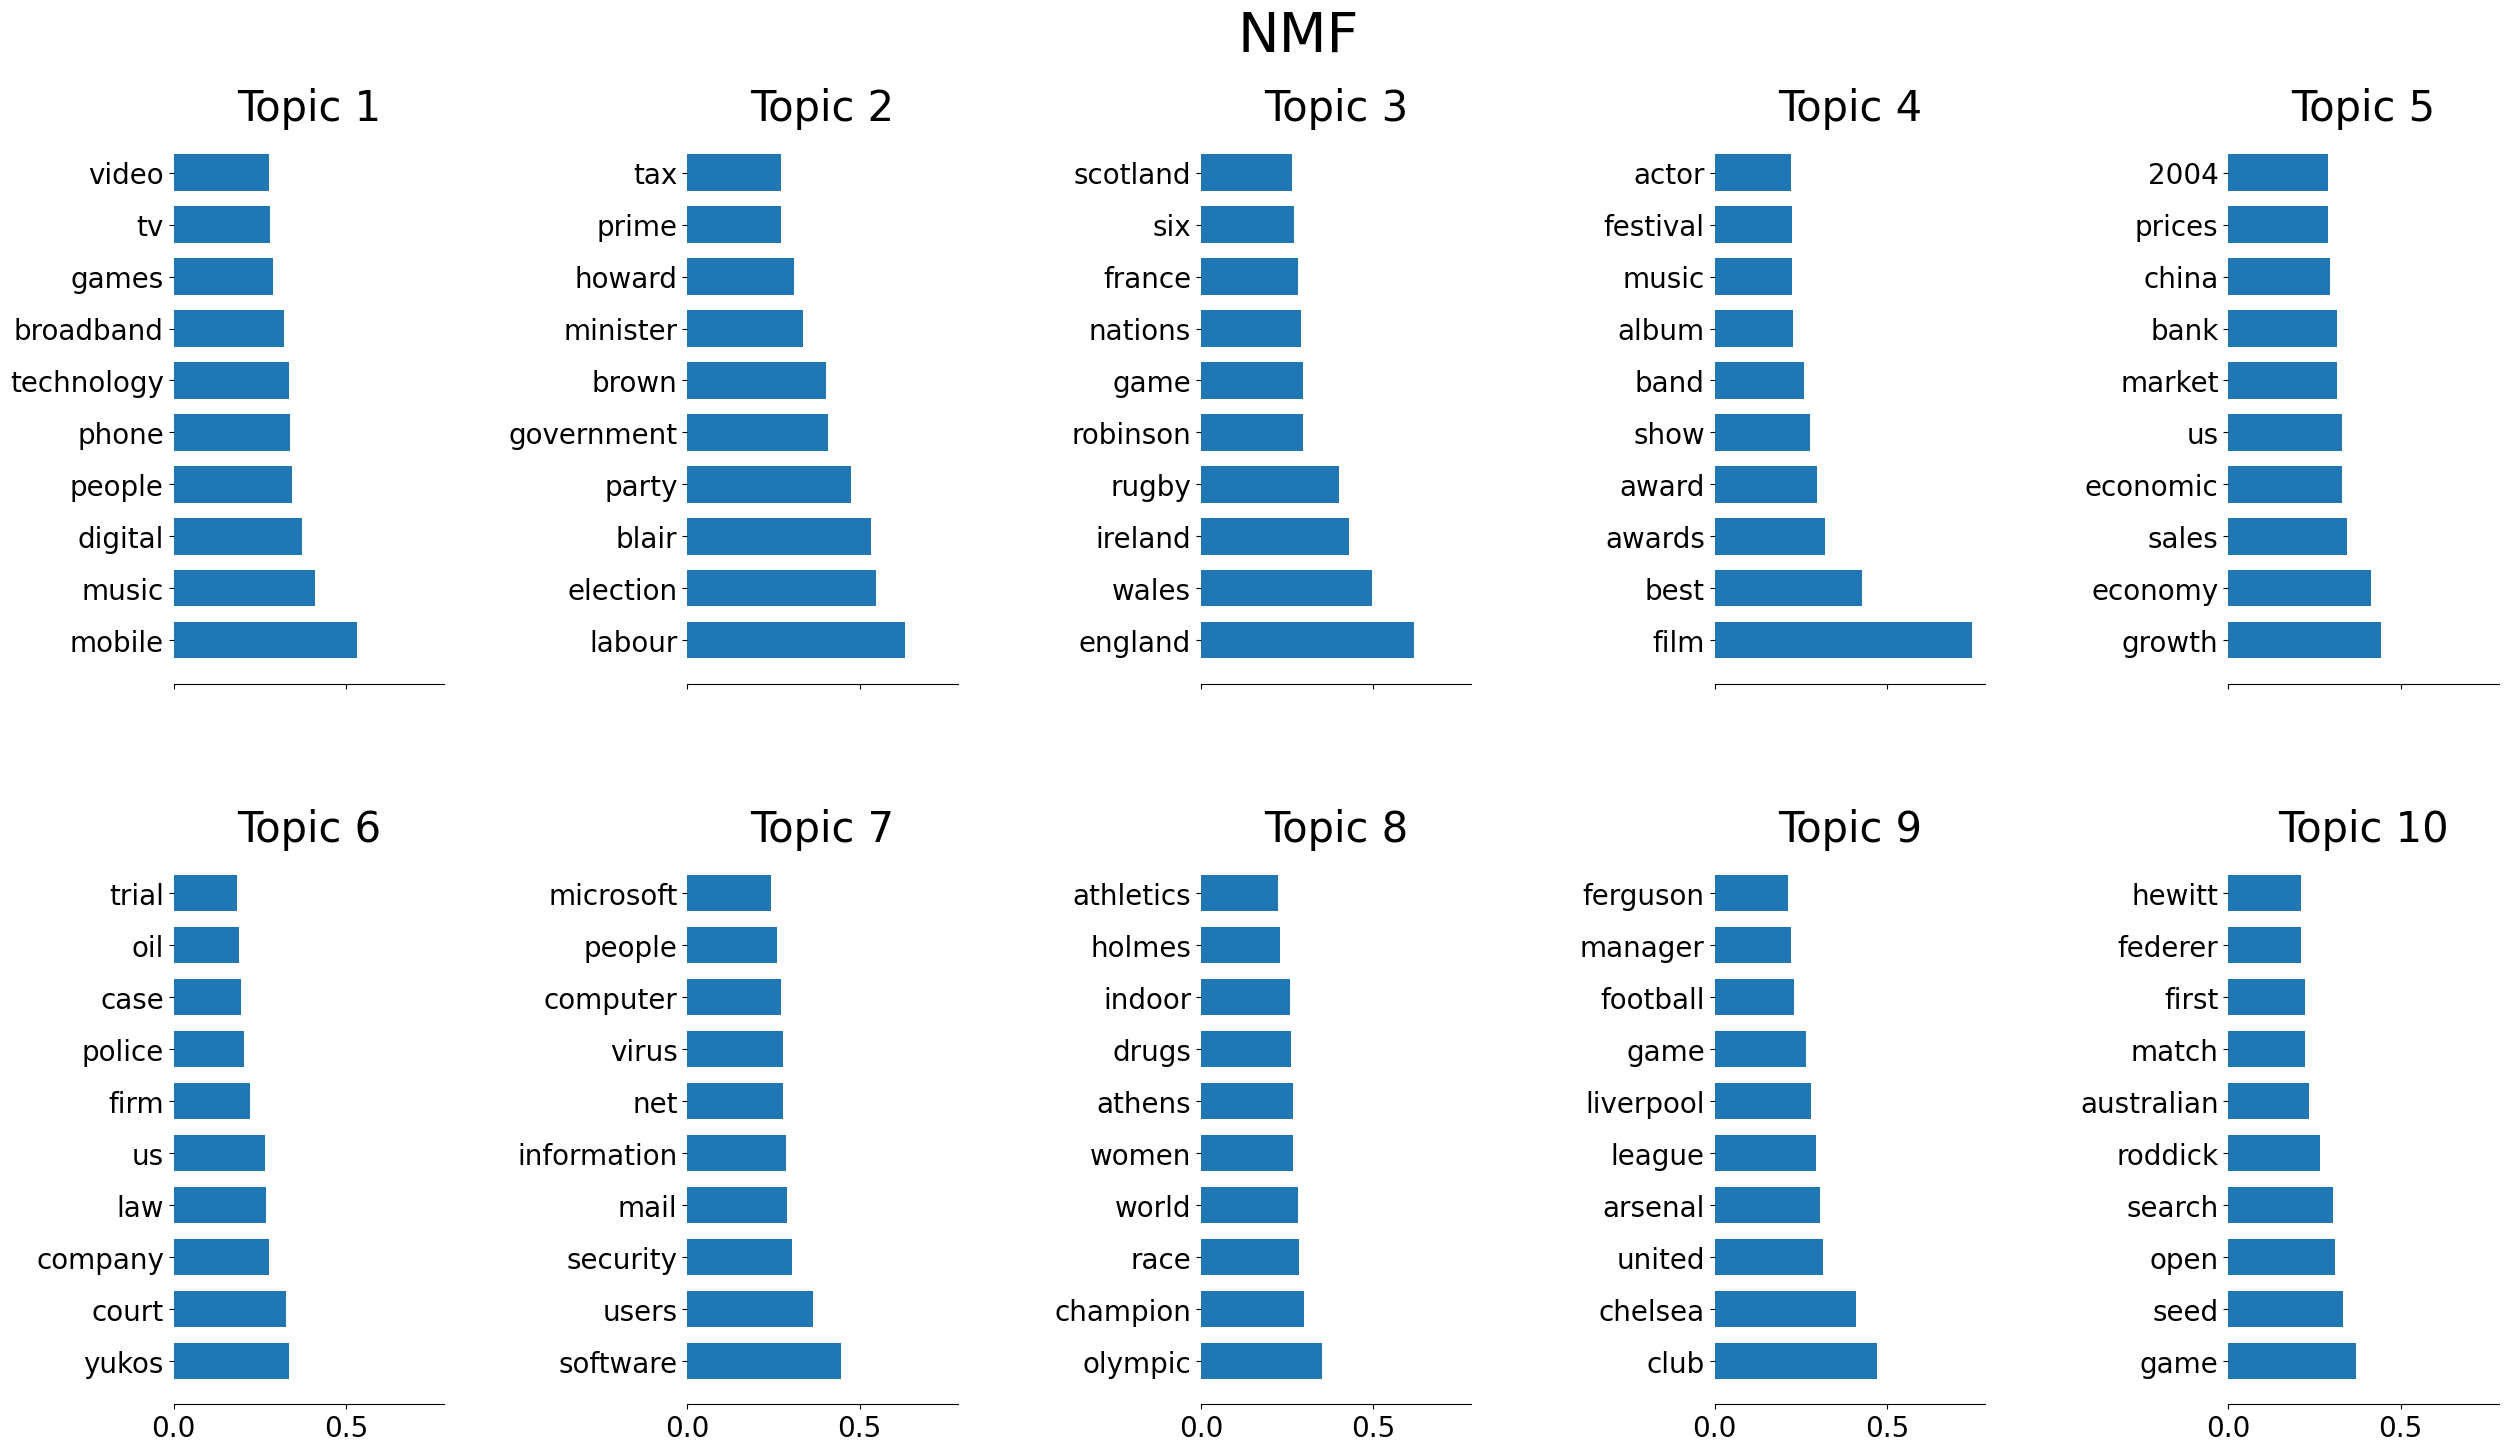

In [11]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf,feature_names,10)

In [12]:
z = nmf.transform(X)

Text(0.5, 1.0, 'True Label: sport')

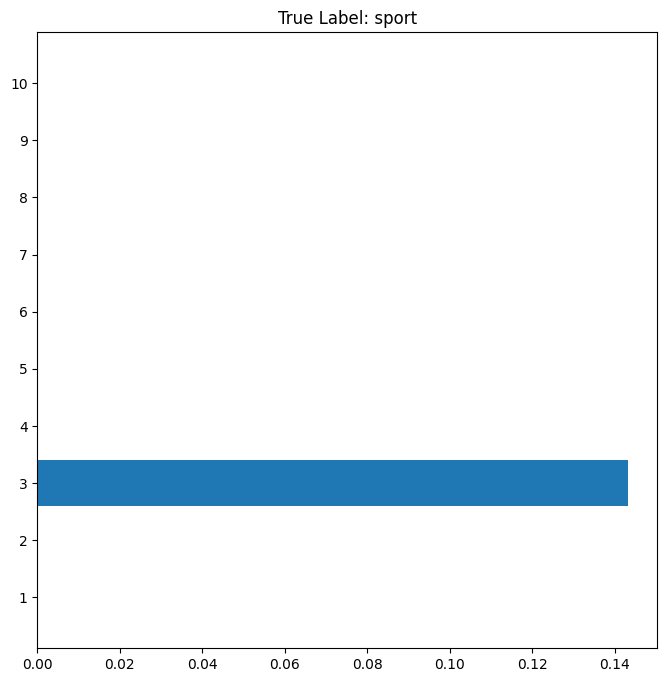

In [13]:
np.random.seed(0)
i = np.random.choice(len(df))
Z=z[i]
topics = np.arange(10)+1
fig , ax = plt.subplots(1,1,figsize=(8,8))
ax.barh(topics,Z)
ax.set_yticks(topics)
ax.set_title('True Label: %s' % df.loc[i]['labels'])


In [14]:
def wrap(x):
  return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)
print(wrap(df.loc[i]['text']))

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g